<h1>cl-MDS atomic-structure example</h1>

In [6]:
import numpy as np
# Source - https://stackoverflow.com/a
# Posted by NHDaly, modified by community. See post 'Timeline' for change history
# Retrieved 2025-12-04, License - CC BY-SA 4.0
import sys
sys.path.insert(0, '/u/73/alshaed1/unix/cl-MDS')

import os
print(os.environ['CONDA_DEFAULT_ENV'])

import cluster_mds as clmds

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

conda-example2


Initialize clMDS class

In [7]:
data = clmds.clMDS(atoms='qm9_F_struct.xyz',
                   descriptor="quippy_soap_turbo",
                   cutoff=[3., 3.5], do_species=['F'],
                   sparsify='random', n_sparse=1000)

Compute 2-dim. coordinates for the sparse set

In [8]:
n_clusters = 12
Y = data.get_sparse_coordinates(n_clusters)  # Y := [x coord., y coord., cluster label]
C = Y[:,2].astype(int)
M = data.sparse_medoids


Computing descriptors: 100.0%

Computing dist_matrix: 100.0%
Clustering sparse points:
# Iteration; Residual ('rel' incoherence criterion)
           1  0.14272983470067160     
          10  0.13765994583919661     
           9  0.11864858425871609     
           8  0.11360806051772371     
           7  0.11035931806755495     
          86  0.10677735202992804     
MDS embedding per initial cluster: 100.0%
MDS embedding of anchor points
Checking for pathological cases: 100.0%
Performing transformations: 100.0%
--------------------------
 Cluster   Transformation
--------------------------
   0        affine (only translation)
   1        affine (overdetermined)
   2        affine (overdetermined)
   3        affine (homography was rejected)
   4        affine (overdetermined)
   5        affine (overdetermined)
   6        homography
   7        homography
   8        affine (overdetermined)
   9        affine (overdetermined)
  10        affine (homography was rejected)
  11    

In [4]:
Y_estim = data.get_estim_coordinates()
C_estim = Y_estim[:,2].astype(int)


Estimation for subset 1/10

Computing descriptors: 100.0%
Assigning each point to cluster: 100.0%
Estimating coordinates: 100.0%

Estimation for subset 2/10

Computing descriptors:  14.7%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Computing descriptors: 100.0%
Assigning each point to cluster: 100.0%
Estimating coordinates: 100.0%

Estimation for subset 5/10

Computing descriptors:  38.2%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Computing descriptors: 100.0%
Assigning each point to cluster:  72.2%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Estimating coordinates: 100.0%

Estimation for subset 8/10

Computing descriptors:  37.0%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Computing descriptors:  96.5%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Plot the results:

In [5]:
dirname = './results_simple/'
data.save_to_file(dir=dirname)


Saving results: 299.9%

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1. Generate the atomic structures corresponding to the medoids (uses ovito)

In [6]:
dir_medoids = dirname + 'medoids/'
data.medoids_to_xyz(dir=dir_medoids, carve_radius=3.5, render=True)

/u/73/alshaed1/unix/miniconda3/envs/conda-example2/lib/python3.8/site-packages/ovito/_extensions/anari.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


Exception: You need Ovito (pip3 install ovito) to use the rendering capability

2. Create the plot

FileNotFoundError: [Errno 2] No such file or directory: './results_simple/medoids/medoid_0.png'

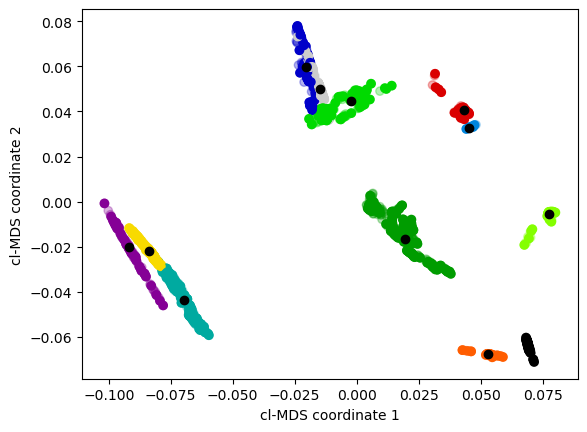

In [7]:
fig, ax = plt.subplots()
ax.scatter(Y_estim[:, 0], Y_estim[:, 1], c=C_estim, cmap='nipy_spectral',
            alpha=0.3)
ax.scatter(Y[:, 0], Y[:, 1], c=C, cmap='nipy_spectral')
ax.scatter(Y[M, 0], Y[M, 1], color='black', label='medoids')
ax.set_xlabel(r'cl-MDS coordinate 1')
ax.set_ylabel(r'cl-MDS coordinate 2')

for i in range(0, n_clusters):
    arr_img = plt.imread(dir_medoids + 'medoid_%i.png' % i, format='png')
    imagebox = OffsetImage(arr_img, zoom=0.3)
    imagebox.image.axes = ax
    cl = data.sparse_clusters[i]
    if Y[M[i],0] < 0:
        a = np.min(Y[cl,0]) - 20
    else:
        a = np.max(Y[cl,0]) + 30
    if Y[M[i],1] < 0:
        b = np.min(Y[cl,1]) - 30
    else:
        b = np.max(Y[cl,1]) + 20
    if i == 0:
        xy = np.array([a,b])[None,:]
    else:
        dist_med = np.sqrt(np.sum((xy - np.array([[a,b]]))**2, axis=1))
        if (dist_med < 0.1).any():
            b = -b
            if a < 0:
                a += 10
            else:
                a -= 10
        xy = np.concatenate((xy, np.array([a,b])[None,:]) )
    ab = AnnotationBbox(imagebox, Y[M[i],:2], xybox=(a, b),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0, frameon=False, arrowprops=dict(arrowstyle="-",
                        connectionstyle="angle,angleA=0,angleB=90,rad=3"))
    ax.add_artist(ab)

plt.legend()
plt.savefig(dirname + 'clmds_plot_simple.png', format='png', dpi=300)
plt.show()


